In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sys
import warnings
warnings.filterwarnings('ignore')

In [96]:
L=5
space=np.linspace(0,L,1000)
f=lambda x: x**2*(5-x)**2*np.e**(np.cos(2*np.pi*x))

Text(0.5, 1.0, 'Plot of Initial Condition')

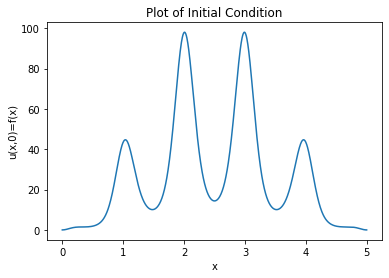

In [97]:
plt.plot(space,f(space));
plt.xlabel('x');
plt.ylabel('u(x,0)=f(x)')
plt.title('Plot of Initial Condition')

In [141]:
space=np.linspace(0,10,1000);
h=lambda x,t: (x*(10-x))/(1+(x-5*(1+(np.sin(2*np.pi*t)/(t+1))))**2);

Text(0.5, 1.0, 'Our Source Term at Different T-Values')

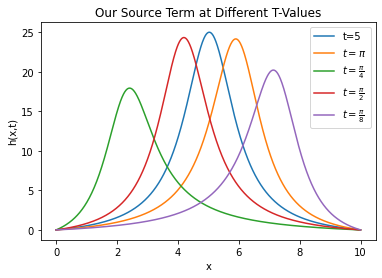

In [176]:
plt.plot(space, h(space,0.001), label='t=5');
plt.plot(space, h(space,np.pi), label=r'$t=\pi$');
plt.plot(space, h(space,np.pi/4), label=r'$t=\frac{\pi}{4}$')
plt.plot(space, h(space,np.pi/2), label=r'$t=\frac{\pi}{2}$')
plt.plot(space, h(space,np.pi/8), label=r'$t=\frac{\pi}{8}$')
plt.legend();
plt.xlabel('x');
plt.ylabel('h(x,t)')
plt.title('Our Source Term at Different T-Values')

In [165]:
L=10;
integrand=lambda x, t, n: h(x,t)*np.sin((n*np.pi*x)/L)

In [166]:
h_n=lambda t, n: np.e**(((n**2)*(np.pi**2)*t)/(L**2))\
*(2/L)*integrate.quad(integrand,0,L,(t,n)) [0]

In [167]:
a_n=lambda t, n:integrate.quad(h_n,0,t,n) [0]

In [177]:
def u(x,t,n):
  results=0;

  for i in np.arange(1,n+1):
    results += a_n(t,i)*np.sin((i*np.pi*x)/L)\
    *np.e**(-((i**2)*(np.pi**2)*t)/(L**2))

  return results

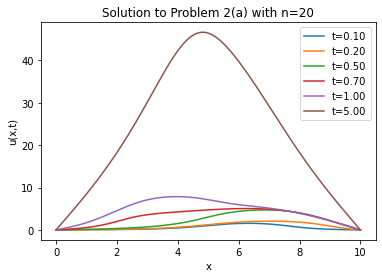

In [180]:
for t in [0.1,.2,.5,.7,1,5]:

  stuff_we_need=u(space,t,20)

  plt.plot(space,stuff_we_need,label='t=%0.2f'%t);
  plt.legend();
  plt.xlabel('x');
  plt.ylabel('u(x,t)')
  plt.title('Solution to Problem 2(a) with n=20')

In [183]:
u_infty= lambda x: x**2/2+13*np.log(x**2-10*x+26)-5*x\
+26*(x-5)*np.arctan((5-x))-13*np.log(26)+130*np.arctan(5)

Text(0.5, 1.0, 'Plot of Solution u(x,t) for t=50 and Asymptotic Solution')

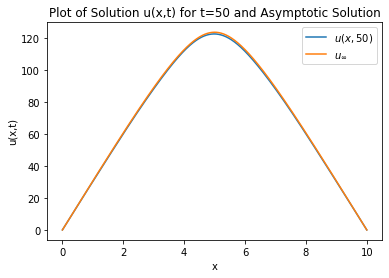

In [185]:
plt.plot(space, u(space,50,10), label=r'$u(x,50)$');
plt.plot(space, u_infty(space), label=r'$u_{\infty}$');

plt.legend();
plt.xlabel('x');
plt.ylabel('u(x,t)');
plt.title('Plot of Solution u(x,t) for t=50 and Asymptotic Solution')